In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\DELL\Desktop\Python prac\Jupyter Programs\Untitled Folder\ML Projects\fakenews.csv")
df

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0
...,...,...
4981,The storybook romance of WWE stars John Cena a...,0
4982,The actor told friends he’s responsible for en...,0
4983,Sarah Hyland is getting real. The Modern Fami...,0
4984,Production has been suspended on the sixth and...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4986 non-null   object
 1   label   4986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,4986,4729,Scoopnest is a web media which finds for you t...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,4986.0,NaN,NaN,NaN,0.403931,0.490733,0.0,0.0,0.0,1.0,1.0


In [5]:
df[df.duplicated()]

,text,label
218,Hollywood insiders have revealed to OK! USA th...,1
340,"IMDb.com, Inc. takes no responsibility for the...",1
365,"Cynthia Ann Crawford (born February 20, 1966) ...",1
463,Scoopnest is a web media which finds for you t...,0
484,About Trendolizer™Trendolizer™ (patent pending...,1
...,...,...
4946,Are wedding bells in the future for Mariah Car...,1
4956,About Trendolizer™Trendolizer™ (patent pending...,1
4966,Need help? Contact the CQ Hotline at (800) 678...,0
4969,"IMDb.com, Inc. takes no responsibility for the...",1


In [6]:
df = df.drop_duplicates(subset=['text'])

In [7]:
df.shape

(4729, 2)

In [8]:
df['label'].value_counts()

label
0    2869
1    1860
Name: count, dtype: int64

In [9]:
df['label'].value_counts(normalize= True)

label
0    0.606682
1    0.393318
Name: proportion, dtype: float64

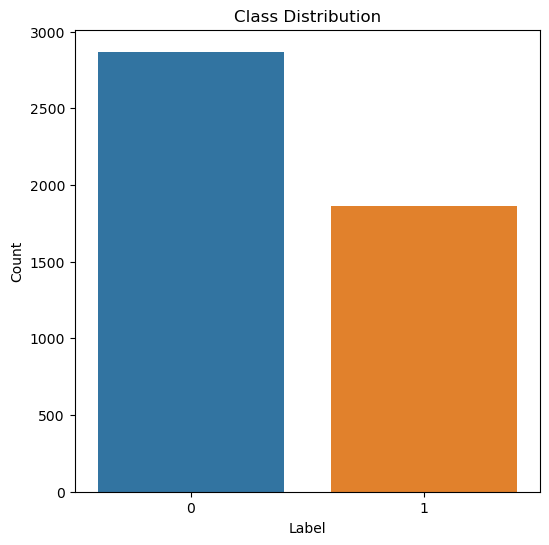

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13364\4210842552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


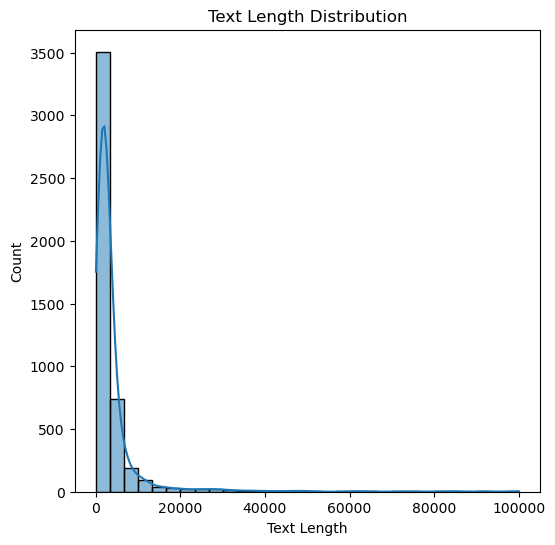

In [11]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(6, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Data Prepration 

In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [36]:
stemmer = PorterStemmer()

# lemmatizer = WordNetLemmatizer()

In [40]:

def preprocess(content):
    # Removing special characters and digits
    sentance = re.sub("[^a-zA-Z]", " ", content)

    # change sentence to lower case
    sentance = sentance.lower()

    # tokenize into words
    token = sentance.split() 

    # remove stop words  
    rem_sw = [word for word in token if not word in  stopwords.words('english')]

     # Stemming/Lemmatization
    rem_sw = [stemmer.stem(word) for word in rem_sw]
    
    return pd.Series([" ".join(rem_sw), len(rem_sw)])

# Spliting Data into Train & Test

In [15]:
x= df[['text']] #input
y =df['label'] # output

In [16]:
from sklearn.model_selection import train_test_split as split

In [45]:
x_train,x_test,y_train,y_test = split(x,y,train_size= 0.75 , random_state = 45)

In [24]:
x_train.head()

,text
2406,Newly-engaged Karlie Kloss couldn’t wait to sh...
3780,Despite the whoring and arguably gratuitous nu...
2339,"The worst part of being a celebrity, undoubted..."
73,It's a race against the clock for Tristan Thom...
810,Taylor Swifts friendship comes with a few perk...


In [46]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3546, 1) (3546,)
(1183, 1) (1183,)


In [20]:
from tqdm import tqdm, tqdm_notebook

In [21]:
tqdm.pandas()

In [26]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
temp = x_train['text'].progress_apply(lambda a: preprocess(a))
temp.head()

100%|██████████| 3546/3546 [26:27<00:00,  2.23it/s]  


,0,1
2406,newli engag karli kloss wait share happi news ...,277
3780,despit whore arguabl gratuit nuditi book stran...,502
2339,worst part celebr undoubtedli must famili reun...,745
73,race clock tristan thompson propos khlo kardas...,180
810,taylor swift friendship come perk ed sheeran p...,254


In [42]:
temp.columns=(['clean_text_stem','text_lenght_stem'])
temp.head()

,clean_text_stem,text_lenght_stem
2406,newli engag karli kloss wait share happi news ...,277
3780,despit whore arguabl gratuit nuditi book stran...,502
2339,worst part celebr undoubtedli must famili reun...,745
73,race clock tristan thompson propos khlo kardas...,180
810,taylor swift friendship come perk ed sheeran p...,254


In [43]:
from wordcloud import WordCloud

In [50]:
y_train.head() # 1 is fake news and 0 is real news  

2406    0
3780    0
2339    1
73      1
810     1
Name: label, dtype: int64

In [52]:
fake_news = temp.loc[y_train==1,:]
fake_news.head()

,clean_text_stem,text_lenght_stem
2339,worst part celebr undoubtedli must famili reun...,745
73,race clock tristan thompson propos khlo kardas...,180
810,taylor swift friendship come perk ed sheeran p...,254
4062,nicol kidman fearless year old big littl lie s...,158
908,pippa middleton know like someon steal spotlig...,216


In [56]:
words = ' '.join(fake_news['clean_text_stem'])

print(words[:50])

worst part celebr undoubtedli must famili reunion 


In [61]:
fake_word_cloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='white',
                      width=1200,
                      height=800
                     ).generate(words)

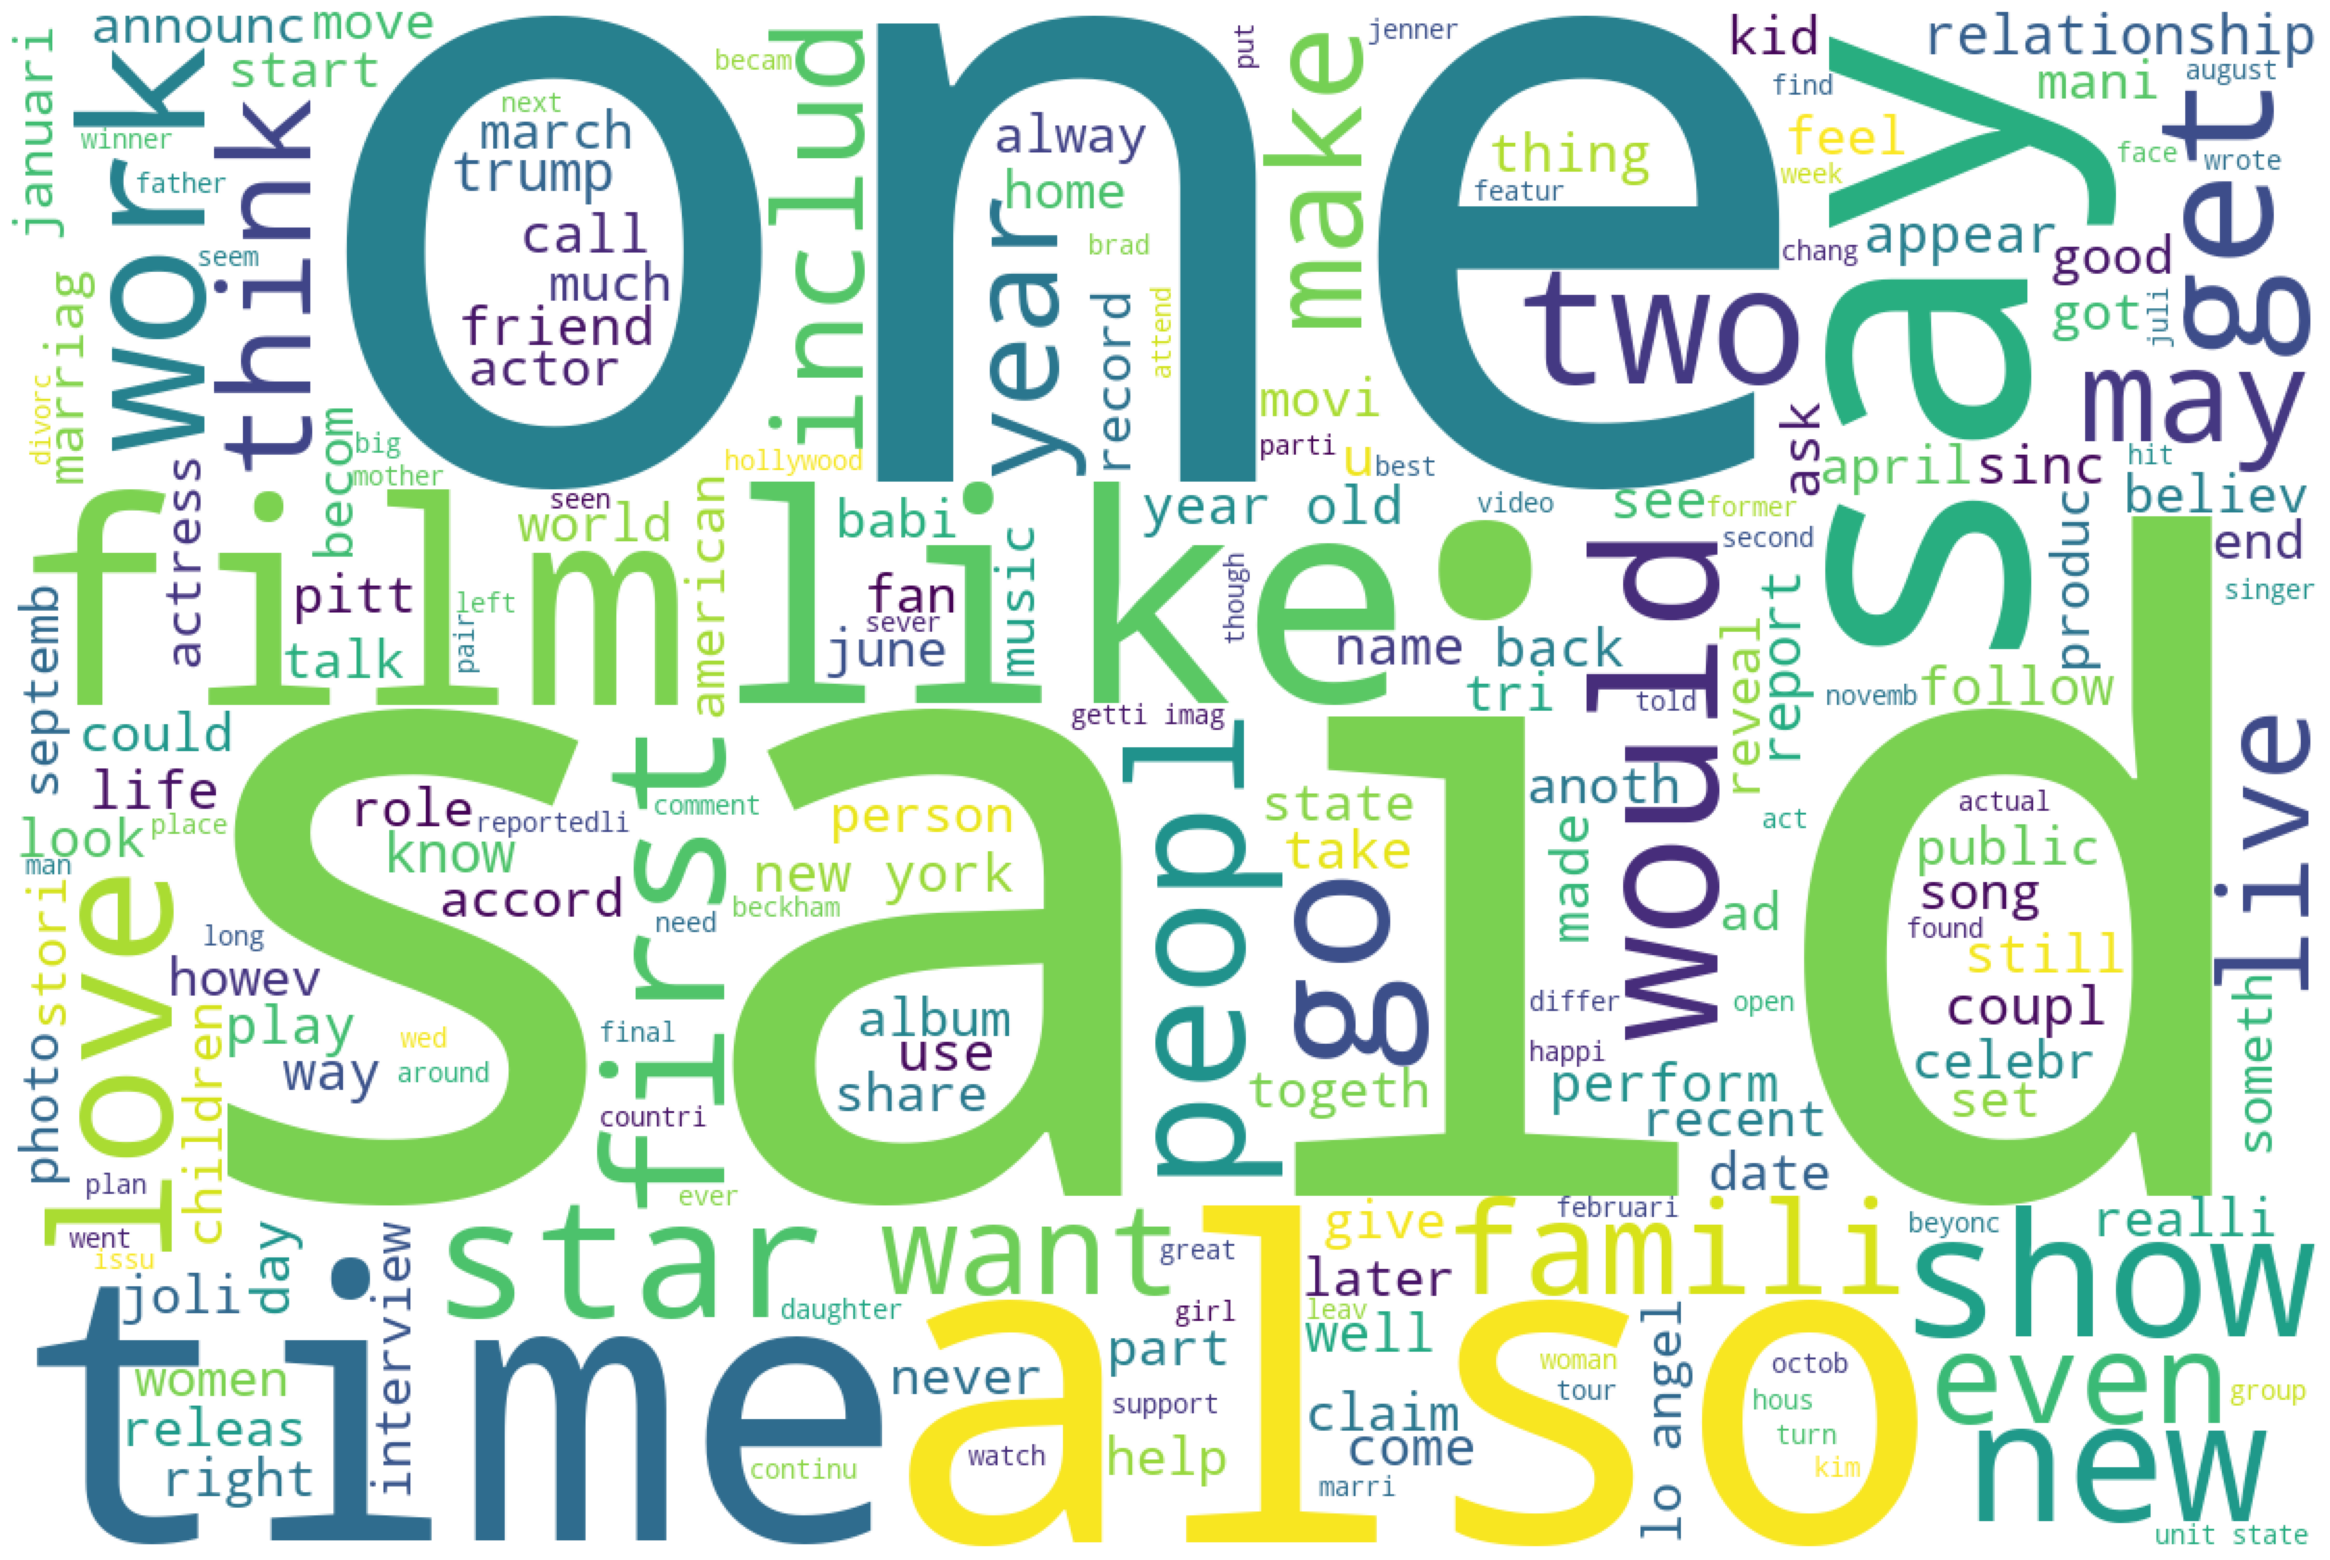

In [62]:
plt.figure(1,figsize=(30,20))
plt.imshow(fake_word_cloud)
plt.axis('off')
plt.show()

In [63]:
real_news = temp.loc[y_train==0,:]
real_news.head()

,clean_text_stem,text_lenght_stem
2406,newli engag karli kloss wait share happi news ...,277
3780,despit whore arguabl gratuit nuditi book stran...,502
1476,get celeb updat directli inbox subscrib thank ...,268
3552,american fashion design former actress detail ...,1031
3325,thanksgiv right around corner mean time embark...,75


In [66]:
words_1 = ' '.join(real_news['clean_text_stem'])
print(words_1[:50])

newli engag karli kloss wait share happi news clos


In [67]:
real_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words)

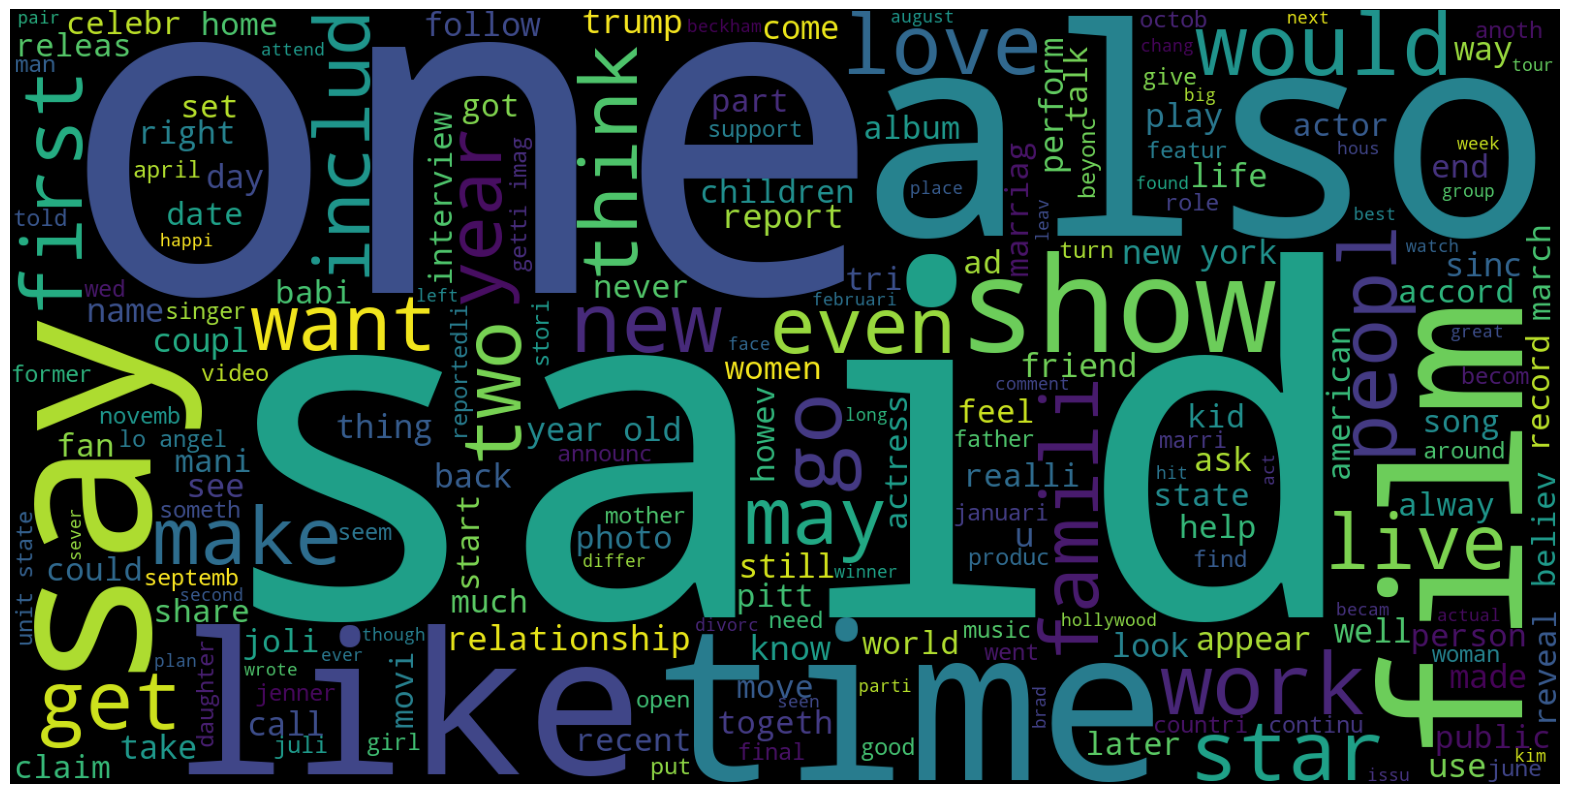

In [68]:
plt.figure(1,figsize=(20,20))
plt.imshow(real_wordcloud)
plt.axis('off')
plt.show()

In [72]:
temp.head()

,clean_text_stem,text_lenght_stem
2406,newli engag karli kloss wait share happi news ...,277
3780,despit whore arguabl gratuit nuditi book stran...,502
2339,worst part celebr undoubtedli must famili reun...,745
73,race clock tristan thompson propos khlo kardas...,180
810,taylor swift friendship come perk ed sheeran p...,254


# Data Transformation

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(temp['clean_text_stem'])

In [75]:
x_train_bow

<3546x36973 sparse matrix of type '<class 'numpy.int64'>'
	with 681351 stored elements in Compressed Sparse Row format>

In [76]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(x_train_bow))

print("Shape of input data:", x_train_bow.shape)

Total unique words: 36973
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (3546, 36973)


In [77]:
vocab.vocabulary_

{'newli': 22447,
 'engag': 10093,
 'karli': 17133,
 'kloss': 17694,
 'wait': 35295,
 'share': 29269,
 'happi': 13912,
 'news': 22454,
 'closest': 6178,
 'includ': 15584,
 'good': 13042,
 'friend': 11983,
 'princess': 25619,
 'beatric': 2639,
 'instagram': 15847,
 'stori': 31179,
 'wednesday': 35567,
 'morn': 21588,
 'supermodel': 31626,
 'confirm': 6627,
 'longtim': 19168,
 'boyfriend': 3801,
 'joshua': 16781,
 'kushner': 17999,
 'tuesday': 33601,
 'post': 25313,
 'seri': 29074,
 'famou': 10842,
 'reaction': 26547,
 'facetim': 10752,
 'first': 11338,
 'sister': 29789,
 'kimbi': 17559,
 'kristin': 17914,
 'came': 4708,
 'grandma': 13225,
 'follow': 11634,
 'penni': 24443,
 'thow': 32730,
 'board': 3483,
 'member': 20706,
 'kode': 17778,
 'klossi': 17695,
 'childhood': 5677,
 'davi': 7813,
 'petrash': 24623,
 'get': 12614,
 'push': 25989,
 'notif': 22870,
 'featur': 11011,
 'might': 20988,
 'sweetest': 31813,
 'royal': 27894,
 'jaw': 16417,
 'immedi': 15455,
 'drop': 9271,
 'flash': 1143

In [78]:
sorted(vocab.vocabulary_)

['aa',
 'aaa',
 'aaaaand',
 'aabb',
 'aac',
 'aaden',
 'aakar',
 'aaliyah',
 'aandahl',
 'aapl',
 'aaron',
 'aaroncart',
 'aarp',
 'aasen',
 'aatrh',
 'aau',
 'aazwd',
 'ab',
 'aba',
 'ababa',
 'abaca',
 'aback',
 'abacu',
 'abadi',
 'abandon',
 'abasolo',
 'abat',
 'abaya',
 'abba',
 'abbasi',
 'abbevil',
 'abbey',
 'abbeyclancyoffici',
 'abbi',
 'abbigail',
 'abbigailsing',
 'abbott',
 'abboud',
 'abbrevi',
 'abbydphillip',
 'abbyle',
 'abbyleemil',
 'abc',
 'abcnetwork',
 'abcnew',
 'abcnewsradio',
 'abdallah',
 'abdel',
 'abdelilah',
 'abdelsalam',
 'abdic',
 'abdomen',
 'abdomin',
 'abdrig',
 'abduct',
 'abductor',
 'abdul',
 'abdullah',
 'abe',
 'abedi',
 'abedin',
 'abel',
 'abercrombi',
 'aberdeen',
 'aberdeenshir',
 'abernathi',
 'abernethi',
 'abeson',
 'abet',
 'abfalecbaldwin',
 'abfound',
 'abhorr',
 'abi',
 'abid',
 'abigail',
 'abil',
 'abilifi',
 'abject',
 'abkhazia',
 'abl',
 'ablaz',
 'abloh',
 'abn',
 'abnorm',
 'abnosi',
 'abo',
 'aboah',
 'aboard',
 'abod',
 'abol

In [81]:
x_test.head()

,text
1961,If you haven’t caught the ‘I Love the ’90s Tou...
759,They will always be family. But David and Vict...
673,Oprah Winfrey Getty Images President Donald T...
4968,The teaser poster from 'Aladdin' (Photo: WALT ...
2276,7 Ways Ben Affleck Made Sure the Spotlight Was...


In [82]:
temp_df = x_test['text'].progress_apply(lambda x : preprocess (x))
temp_df.head()

100%|██████████| 1183/1183 [08:03<00:00,  2.45it/s]


,0,1
1961,caught love tour past coupl year leav road set...,57
759,alway famili david victoria lead differ live s...,64
673,oprah winfrey getti imag presid donald trump l...,380
4968,teaser poster aladdin photo walt disney magic ...,162
2276,way ben affleck made sure spotlight lindsay sh...,49


In [83]:
temp_df.columns= (['clean_text','text_length'])
temp_df.head()

,clean_text,text_length
1961,caught love tour past coupl year leav road set...,57
759,alway famili david victoria lead differ live s...,64
673,oprah winfrey getti imag presid donald trump l...,380
4968,teaser poster aladdin photo walt disney magic ...,162
2276,way ben affleck made sure spotlight lindsay sh...,49


In [85]:
x_test_bow = vocab.transform(temp_df['clean_text'])
x_test_bow

<1183x36973 sparse matrix of type '<class 'numpy.int64'>'
	with 224570 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression()
log_re.fit(x_train_bow,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_test_pre = log_re.predict(x_test_bow)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test_pre,y_test)

0.7447168216398986

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_bow,y_train)


DecisionTreeClassifier()

In [95]:
y_test_p = dtc.predict(x_test_bow)
accuracy_score(y_test_p,y_test)

0.6821639898562976

In [96]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train)

RandomForestClassifier()

In [98]:
y_test_pred = classifier.predict(x_test_bow)
accuracy_score(y_test_pred,y_test)

0.7472527472527473

In [103]:
from sklearn.svm import SVC

In [105]:
svc_c = SVC()
svc_c.fit(x_train_bow,y_train)

SVC()

In [107]:
y_pre = svc_c.predict(x_test_bow)
accuracy_score(y_pre,y_test)

0.727810650887574

 # RandomForestClassifier has higher accuracy then other Classifier models